# Feature Engineering

Parte: Drikz

Features:
* New_Price
* Power
* Location

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import data
data = pd.read_csv('../input/train.csv')
# visualize first 5 rows
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [3]:
print(data.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


# Location

In [4]:
print(data['Location'].unique())

['Pune' 'Chennai' 'Coimbatore' 'Jaipur' 'Mumbai' 'Kochi' 'Kolkata' 'Delhi'
 'Bangalore' 'Hyderabad' 'Ahmedabad']


In [5]:
grouped_data = data.groupby('Location')
location_stats = grouped_data['Price'].agg(['mean', 'median', 'min', 'max'])
location_stats_sorted = location_stats.sort_values(by='mean', ascending=False)

print("Zonas mais caras:")
print(location_stats_sorted.head(3))
print("\nZonas mais baratas:")
print(location_stats_sorted.tail(3))

Zonas mais caras:
                 mean  median   min    max
Location                                  
Coimbatore  15.160206    8.36  1.68  93.67
Bangalore   13.482670    6.97  1.65  93.00
Kochi       11.309109    6.81  1.26  97.07

Zonas mais baratas:
              mean  median   min   max
Location                              
Pune      6.951000    4.50  0.44  68.0
Jaipur    5.916725    4.25  0.45  42.5
Kolkata   5.733924    3.75  0.65  75.0


Percentagem de automóveis por localidade

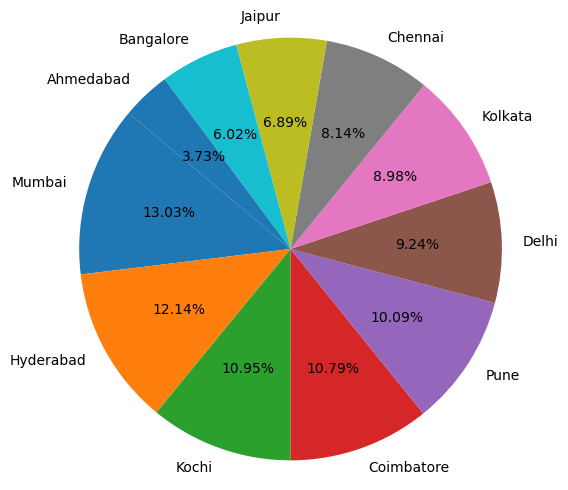

In [6]:
state_percentage = data['Location'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(state_percentage, labels=state_percentage.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')

plt.show()

# Power

Esta feature descreve a potência do motor em brake horsepower (bhp).

Quanto maior o número de "bhp", maior é a potência do moto, o que resulta num melhor desempenho do veículo.

Primeiro vamos verificar o número de missing values neste atributo.

In [7]:
print('Número de missing values na feature "Power":')
print(data['Power'].isnull().sum())

Número de missing values na feature "Power":
36


In [8]:
data['Power'] = data['Power'].str.rstrip(' bhp').astype(float)
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.70,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.10,5.0,NaN,3.50


In [9]:
correlation = data['Power'].corr(data['Price'])
print(f'Correlação entre as features "Power" e "Price": {correlation:.2f}')


Correlação entre as features "Power" e "Price": 0.77


In [10]:
print(data[data['Power'].isna()])

      Unnamed: 0                                          Name    Location  \
186          194                            Honda City 1.5 GXI   Ahmedabad   
200          208                          Maruti Swift 1.3 VXi     Kolkata   
709          733                          Maruti Swift 1.3 VXi     Chennai   
723          749                  Land Rover Range Rover 3.0 D      Mumbai   
1253        1294                             Honda City 1.3 DX       Delhi   
1284        1327                          Maruti Swift 1.3 ZXI   Hyderabad   
1339        1385                            Honda City 1.5 GXI        Pune   
1412        1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore   
2014        2074                          Maruti Swift 1.3 LXI        Pune   
2036        2096                     Hyundai Santro LP zipPlus  Coimbatore   
2199        2264                           Toyota Etios Liva V        Pune   
2256        2325                      Maruti Swift 1.3 VXI ABS  